In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [45]:
digits = load_digits()

In [46]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [47]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

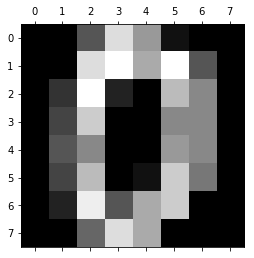

In [93]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [49]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [50]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [53]:
len(x_train)

1437

In [54]:
len(x_test)

360

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [56]:
model.fit(x_train,y_train)

/home/abhishek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abhishek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
model.score(x_test,y_test)

0.9694444444444444

In [58]:
digits.target[67]

6

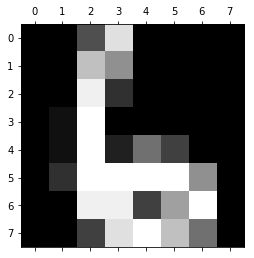

In [94]:
plt.matshow(digits.images[67])
plt.show()

In [60]:
model.predict([digits.data[67]])

array([6])

In [61]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [62]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(69.0, 0.5, 'Truth')

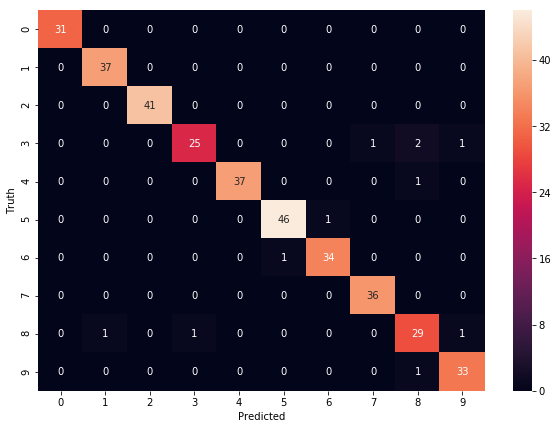

In [63]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
import pandas as pd
flwr = pd.read_csv("iris.csv")
flwr.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [79]:
from sklearn.model_selection import train_test_split
flrx_train,flrx_test,flry_train,flry_test = train_test_split(flwr[['sepal.length',\
                                                                   'sepal.width','petal.length','petal.width']],flwr['variety'],test_size=0.2)
print(flrx_train.shape)
print(flrx_test.shape)
print(flry_train.shape)
print(flry_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [84]:
from sklearn.linear_model import LogisticRegression
flwrmodel = LogisticRegression()

In [85]:
flwrmodel.fit(flrx_train, flry_train)

/home/abhishek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abhishek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
flwrmodel.predict([[5.1,3.5,1.4,0.2]])

array(['Setosa'], dtype=object)

In [87]:
flwrmodel.score(flrx_test,flry_test)

1.0

In [88]:
flry_predicted = flwrmodel.predict(flrx_test)
from sklearn.metrics import confusion_matrix

flrcm = confusion_matrix(flry_test,flry_predicted)
flrcm

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]])

Text(69.0, 0.5, 'Truth')

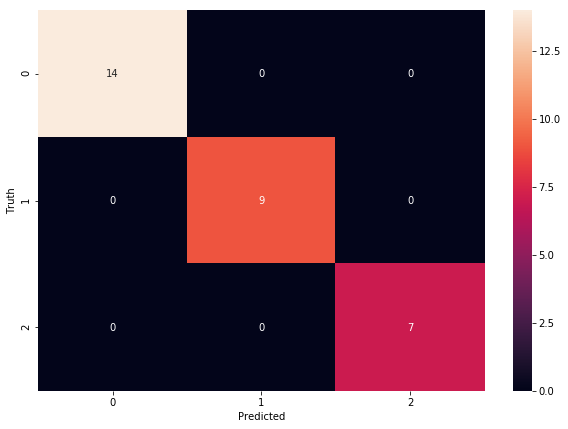

In [89]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(flrcm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')